In [50]:
"""C PHANI RAJ 
MCS201813
MSC CS 1 YEAR
"""
import pandas as pd
import numpy as np

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
import sklearn
import chardet

In [53]:
with open("/home/mani/Courses/SMSSpamCollection","rb") as f:
    result = chardet.detect(f.read())
print(result['encoding'])
df_raw = pd.read_csv("/home/mani/Courses/SMSSpamCollection,sep='\t',names=["v1","v2"],encoding=result['encoding'])

utf-8


In [54]:
df_raw.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
df=df_raw[['v1','v2']].rename(columns={'v1':'label','v2':'sms'})

In [56]:
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [58]:
df.drop_duplicates(subset="sms",inplace=True)

In [59]:
df.describe()

,label,sms
count,5169,5169
unique,2,5169
top,ham,I've been barred from all B and Q stores for l...
freq,4516,1


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X=df['sms']

In [62]:
y=df['label']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [64]:
print("Shape of X is {}".format(X.shape))
print("Shape of X_train is {} and shape of y_train is {}".format(X_train.shape, y_train.shape))
print("Shape of X_test is {} and shape of y_test is {}".format(X_test.shape, y_test.shape))

Shape of X is (5169,)
Shape of X_train is (3876,) and shape of y_train is (3876,)
Shape of X_test is (1293,) and shape of y_test is (1293,)


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [67]:
"""
n statistics, the logistic model (or logit model) is a widely used statistical model that, 
in its basic form, uses a logistic function to model a binary dependent variable; many more complex extensions exist. 
In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model; 
it is a form of binomial regression. Mathematically, 
a binary logistic model has a dependent variable with two possible values, such as pass/fail, win/lose, alive/dead or healthy/sick; these are represented by an indicator variable, 
where the two values are labeled "0" and "1". 
In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); 
the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). 
The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; 
the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, 
from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; 
the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, 
with each dependent variable having its own parameter; for a binary independent variable this generalizes the odds ratio.
"""
from sklearn.linear_model import LogisticRegression

In [68]:
logreg = LogisticRegression(random_state=42)
pipeline = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', logreg)])

In [69]:
cv_score_reg = cross_val_score(pipeline, X_train, y_train, cv=5)
print("The Cross Validation score for Logistic Regression is:")
print(cv_score_reg)

The Cross Validation score for Logistic Regression is:
[0.96005155 0.96262887 0.95870968 0.96645161 0.96124031]


In [70]:
def change_to_binary(label):
    if label == 'ham':
        return 1
    else:
        return 0

In [71]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_recall_curve

In [72]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [73]:
y_bina_true = [change_to_binary(label) for label in list(y_test)] 
y_bina_pred = [change_to_binary(label) for label in list(y_pred)]

In [74]:
accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1score, _ = precision_recall_fscore_support(y_bina_true, y_bina_pred, average='binary')

In [75]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1score)

Accuracy:  0.9675174013921114
Precision:  0.9663793103448276
Recall:  0.9973309608540926
F1 score:  0.9816112084063049


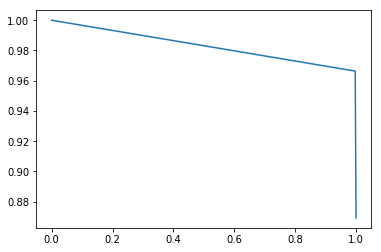

In [76]:
precision, recall, _ = precision_recall_curve(y_bina_true, y_bina_pred)
plt.plot(recall, precision)

In [77]:
"""A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

In decision analysis, a decision tree and the closely related influence diagram are used as a visual and analytical decision support tool, where the expected values (or expected utility) of competing alternatives are calculated.

A decision tree consists of three types of nodes:[1]

Decision nodes – typically represented by squares
Chance nodes – typically represented by circles
End nodes – typically represented by triangles
Decision trees are commonly used in operations research and operations management. If, in practice, decisions have to be taken online with no recall under incomplete knowledge, a decision tree should be paralleled by a probability model as a best choice model or online selection model algorithm. Another use of decision trees is as a descriptive means for calculating conditional probabilities.

Decision trees, influence diagrams, utility functions, and other decision analysis tools and methods are taught to undergraduate students in schools of business, health economics, and public health, and are examples of operations research or management science methods.
"""
from sklearn.tree import DecisionTreeClassifier

In [78]:
dec_tree = DecisionTreeClassifier()
pipeline_dec_tree = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', dec_tree)])

In [79]:
cv_score_dec_tree = cross_val_score(pipeline_dec_tree, X_train, y_train, cv=5)
print("The cross validation score for Decison Tree is:")
print(cv_score_dec_tree)

The cross validation score for Decison Tree is:
[0.94974227 0.95876289 0.96258065 0.95870968 0.95994832]


In [80]:
pipeline_dec_tree.fit(X_train, y_train)
y_pred = pipeline_dec_tree.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test, y_pred)
precision, rechange_to_binarycall, f1score, _ = precision_recall_fscore_support(y_bina_true, y_bina_pred, average='binary')

In [82]:
print("Accuracy is: ", accuracy)
print("Precision is: ", precision)
print("Recall is: ", recall)
print("F1 score is: ", f1score)

Accuracy is:  0.9481825212683681
Precision is:  0.9663793103448276
Recall is:  0.9973309608540926
F1 score is:  0.9816112084063049


The precision-recall curve


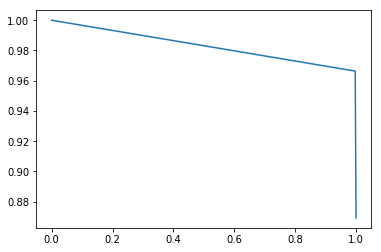

In [83]:
print("The precision-recall curve")
precision, recall, _ = precision_recall_curve(y_bina_true, y_bina_pred)
plt.plot(recall, precision)

In [84]:
"""Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by 
constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
 Random decision forests correct for decision trees' habit of overfitting to their training set. 

The first algorithm for random decision forests was created by Tin Kam Ho[1] using the random subspace method,
which, in Ho's formulation, is a way to implement the "stochastic discrimination" approach to classification proposed by Eugene Kleinberg

An extension of the algorithm was developed by Leo Breiman[7] and Adele Cutler,[8] who registered[9] "Random Forests" as a trademark (as of 2019, owned by Minitab, Inc.).
The extension combines Breiman's "bagging" idea and random selection of features, introduced first by Ho 
and later independently by Amit and Geman[11] in order to construct a collection of decision trees with controlled varianc
"""
from sklearn.ensemble import RandomForestClassifier

In [85]:
randomForest = RandomForestClassifier(random_state=42)
pipelineForest = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', randomForest)])

In [86]:
cvScoreRandomForest = cross_val_score(pipelineForest, X_train, y_train, cv=5)
print("The cross validation score for Random Forest is:")
print(cvScoreRandomForest)

The cross validation score for Random Forest is:
[0.97164948 0.96262887 0.96774194 0.96516129 0.96640827]


In [87]:
pipelineForest.fit(X_train, y_train)
y_pred = pipelineForest.predict(X_test)

In [88]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_bina_true, y_bina_pred, average='binary')
accuracy = accuracy_score(y_test, y_predicted)

In [89]:
print("Accuracy is: ", accuracy)
print("Precision is: ", precision)
print("Recall is: ", recall)
print("F1 score is: ", f1_score)

Accuracy is:  0.9675174013921114
Precision is:  0.9663793103448276
Recall is:  0.9973309608540926
F1 score is:  0.9816112084063049


The precision-recall curve


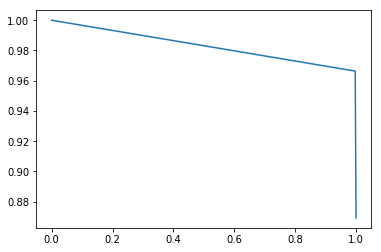

In [90]:
print("The precision-recall curve")
precision, recall, _ = precision_recall_curve(y_bina_true, y_bina_pred)
plt.plot(recall, precision)